# Data Visualization (with Matplotlib and Seaborn)

The primary tool in the Python ecosystem for plotting data and creating figures is **Matplotlib**. This is a very powerful library that gives you access and control of every little thing in creating a figure. This can be good and bad and presents a somewhat steep learning curve - you often have to write many lines of code to produce a simple graphic. A more recent entrant into the PyData community is **Seaborn** (https://stanford.edu/~mwaskom/software/seaborn/examples/index.html). Seaborn is essentially a wrapper around Matplotlib and aims to provide simple access to common types of data visualizations. Also, the Matplotlib default aesthetics are a bit plain, and another thing Seaborn provides is really pretty graphics right out of the box. We're going to learn to use both of these, be sure to pay close attention to when we're using each. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/octaviapayne/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# here we set some aesthetic parameters so that all of our figures are nice and big
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
sns.set(style="white", context="talk")

In [23]:
# Fetch some data to work with
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
filepath = '../DAT-DC-10/data/drinks.csv'
drinks = pd.read_csv(filepath, header=0, names=drink_cols, na_filter=False) #rename columns as you read in file

In [24]:
drinks.head(5)

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


## Histograms
A histogram presents a bar plot to visualize the relative counts of occurence of each possible category. With discrete/categorical variables, we simply count things up and create a bar plot. With continuous variables, you end up creating implicit "categories" by binning up the continuous values into discrete chunks and then counting.

In [25]:
drinks.beer.head(10)

0      0
1     89
2     25
3    245
4    217
5    102
6    193
7     21
8    261
9    279
Name: beer, dtype: int64

We can get some plotting functionality for free from Pandas - Data Frames have built-in methods for calling Matplotlib. 

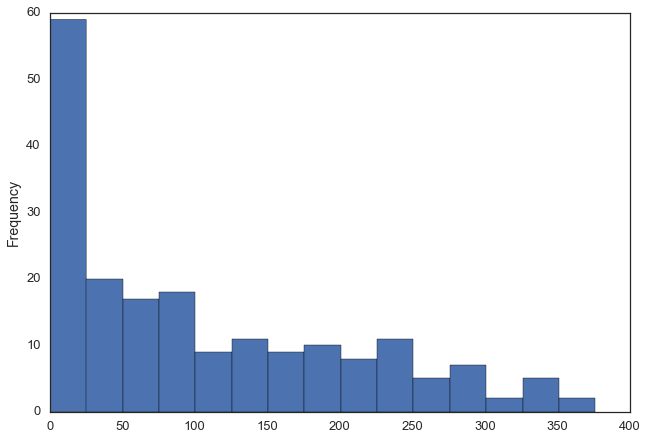

In [26]:
drinks.beer.plot(kind="hist",bins=15)

The histogram visualizes the *distribution* of the values in the **beer** variable. Most are less than 25, but there are some data points all the way out past 350.

Notice that this Matplotlib functionality is built into Data Frames - so it doesn't *appear* that we're calling any external functions. But just to be clear, here's how you would accomplish the same thing more directly using functions from Matplotlib.

(array([ 59.,  20.,  17.,  18.,   9.,  11.,   9.,  10.,   8.,  11.,   5.,
          7.,   2.,   5.,   2.]),
 array([   0.        ,   25.06666667,   50.13333333,   75.2       ,
         100.26666667,  125.33333333,  150.4       ,  175.46666667,
         200.53333333,  225.6       ,  250.66666667,  275.73333333,
         300.8       ,  325.86666667,  350.93333333,  376.        ]),
 <a list of 15 Patch objects>)

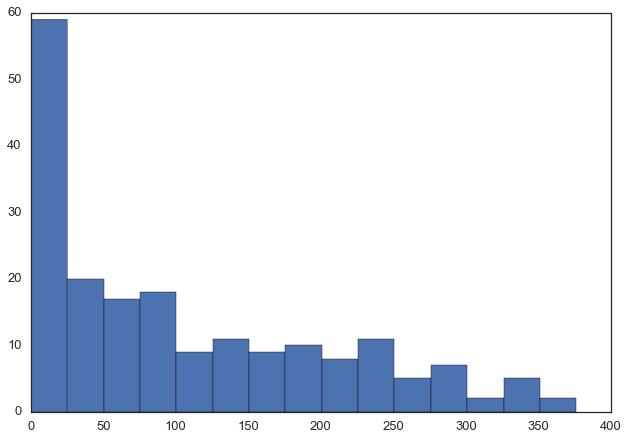

In [27]:
plt.hist(drinks.beer,15)

We can also do this with Seaborn just as easily.

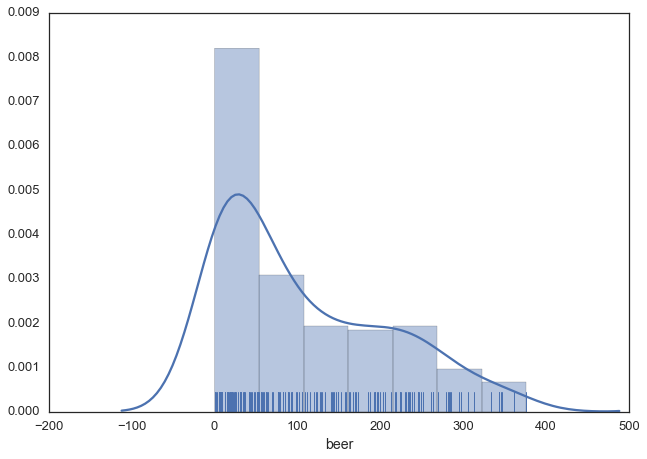

In [28]:
sns.distplot(drinks.beer,  rug=True)

Kernel denstiy estimate = smooth line at top
ticks at bottom is each data point
bars are the aggregate distribution of data points

Seaborn throws in a *rugplot* and a *kernel density estimate* on top of the histogram. These can all be added or removed with the right arguments.

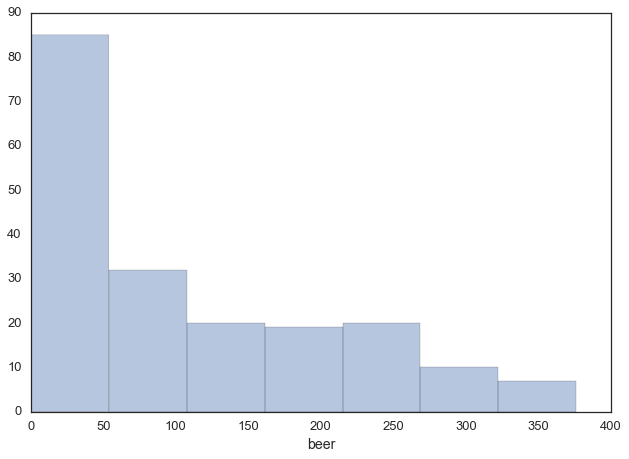

In [29]:
sns.distplot(drinks.beer, rug=False, kde=False)

## Scatterplot
We often want to visualize a *bivariate* distribution - how are two variables related to one another? 

In [30]:
drinks[["beer","wine"]].head()

,beer,wine
0,0,0
1,89,54
2,25,14
3,245,312
4,217,45


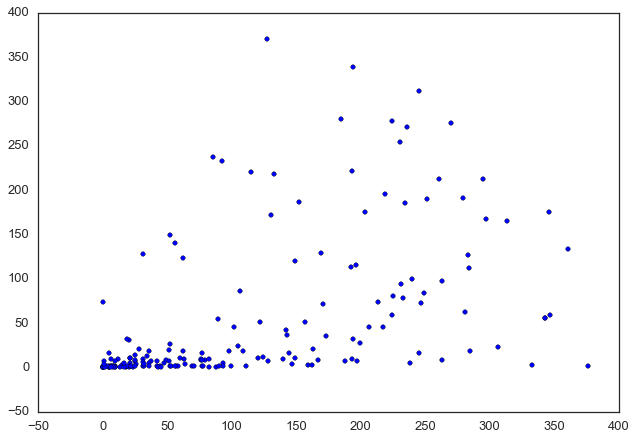

In [31]:
plt.scatter(x=drinks.beer, y= drinks.wine)

/Users/octaviapayne/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


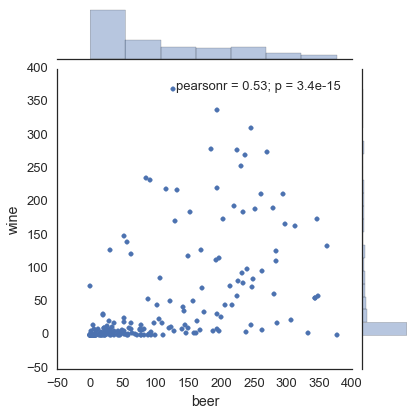

In [32]:
sns.jointplot("beer","wine",data=drinks)

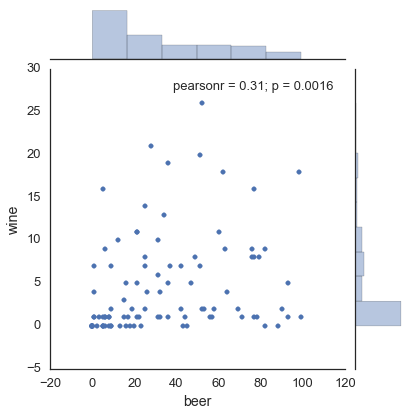

In [33]:
sns.jointplot("beer","wine", data=drinks[(drinks.beer < 100) & (drinks.wine < 30)] )

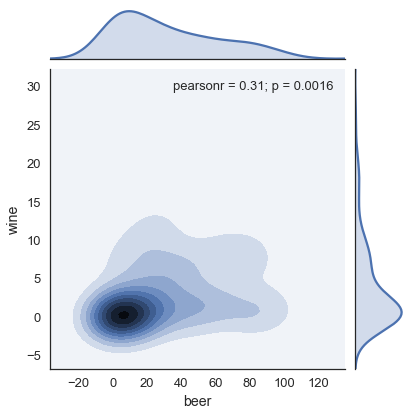

In [34]:
sns.jointplot("beer","wine", data=drinks[(drinks.beer < 100) & (drinks.wine < 30)] , kind = "kde")

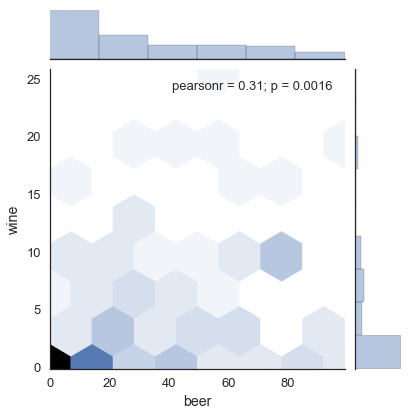

In [35]:
sns.jointplot("beer","wine", data=drinks[(drinks.beer < 100) & (drinks.wine < 30)] , kind = "hex")

Make sure you label your axes. 

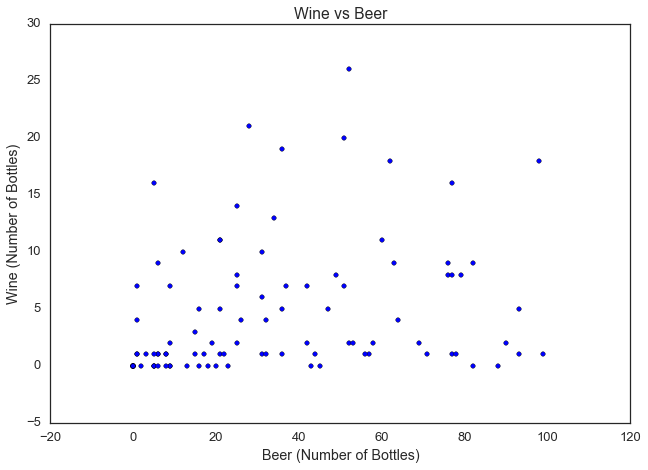

In [36]:
plt.scatter("beer","wine", data=drinks[(drinks.beer < 100) & (drinks.wine < 30)] )
plt.ylabel("Wine (Number of Bottles)")
plt.xlabel("Beer (Number of Bottles)")
plt.title("Wine vs Beer")

## Scatterplot Matrix
Let's look at every bivariate visualization at once

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e803ed0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10f30ba50>]], dtype=object)

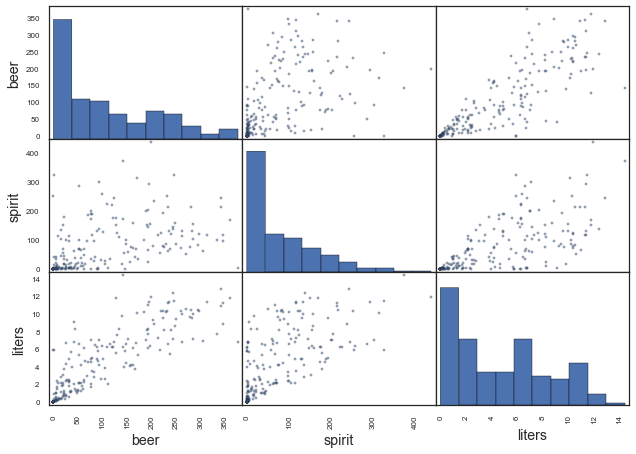

In [37]:
pd.scatter_matrix(drinks[['beer', 'spirit', 'liters']])

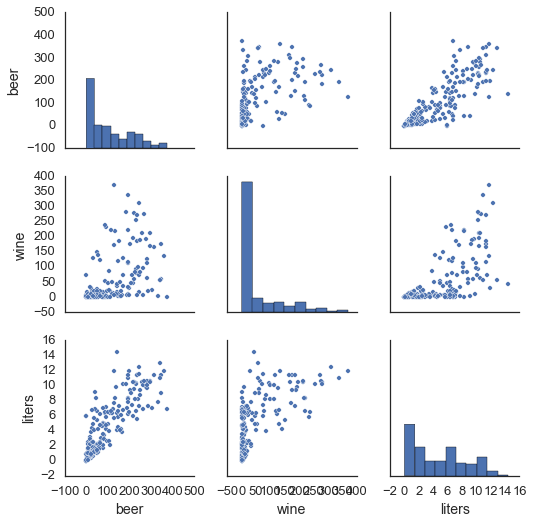

In [38]:
sns.pairplot(drinks[["beer","wine","liters"]])

/Users/octaviapayne/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


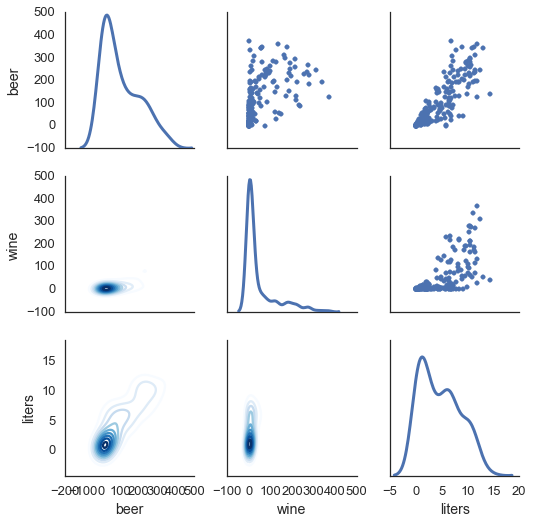

In [39]:
myGraphic = sns.PairGrid(drinks[["beer","wine","liters"]], diag_sharey=False)
myGraphic.map_lower(sns.kdeplot, cmap="Blues")
myGraphic.map_upper(plt.scatter)
myGraphic.map_diag(sns.kdeplot, lw=3)

## Barplot
Visualize counts across discrete variables

In [40]:
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

This Pandas "Series" has a nice plot method

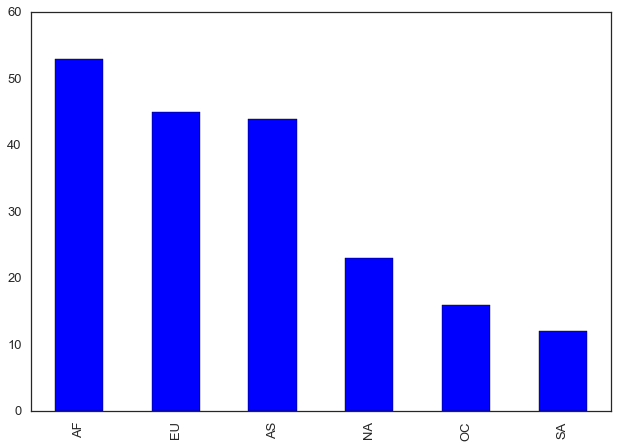

In [41]:
drinks.continent.value_counts().plot(kind="bar")

In [42]:

# calculate the mean alcohol amounts for each continent
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


Pandas groupBy() has some useful behavior with plots 

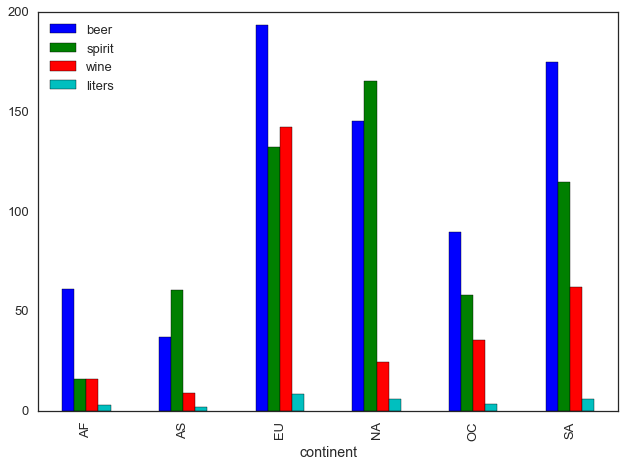

In [43]:

# side-by-side bar plots
drinks.groupby('continent').mean().plot(kind='bar')

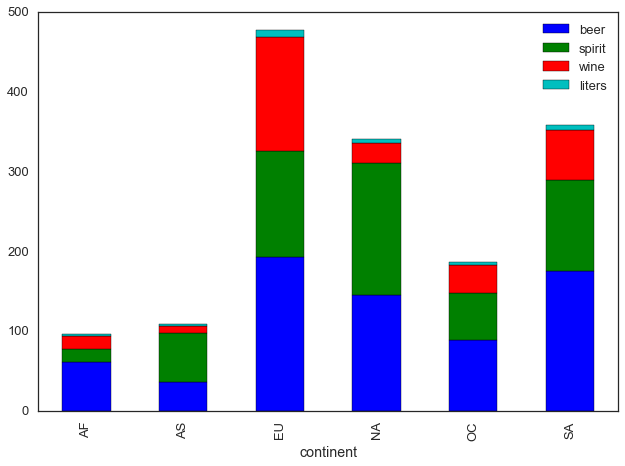

In [44]:
drinks.groupby('continent').mean().plot(kind='bar',stacked=True)

## BoxPlot
Another useful way of visualizing the distribution of a variable. A box plot shows the quantiles of a distribution.

In [45]:
drinks.beer.describe()

count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer, dtype: float64

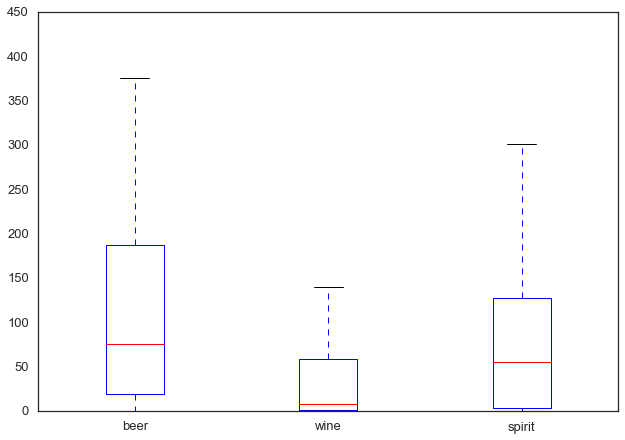

In [46]:
drinks[["beer","wine","spirit"]].plot(kind="box")

/Users/octaviapayne/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:1613: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


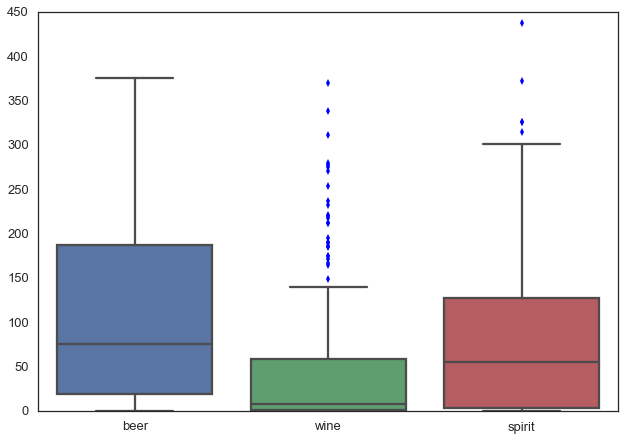

In [47]:
sns.boxplot(drinks[["beer","wine","spirit"]])

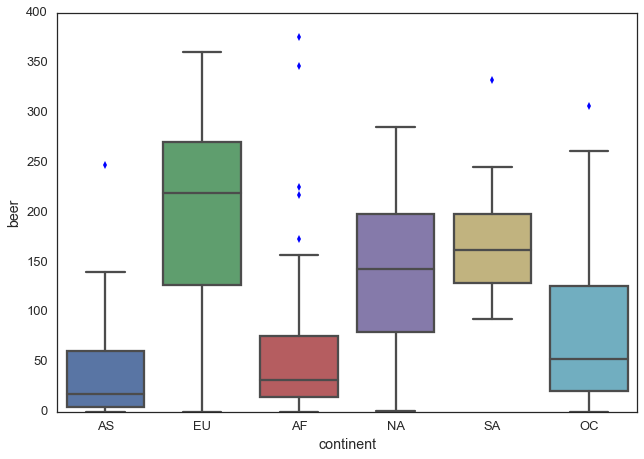

In [48]:
sns.boxplot(x="continent",y="beer",data=drinks)

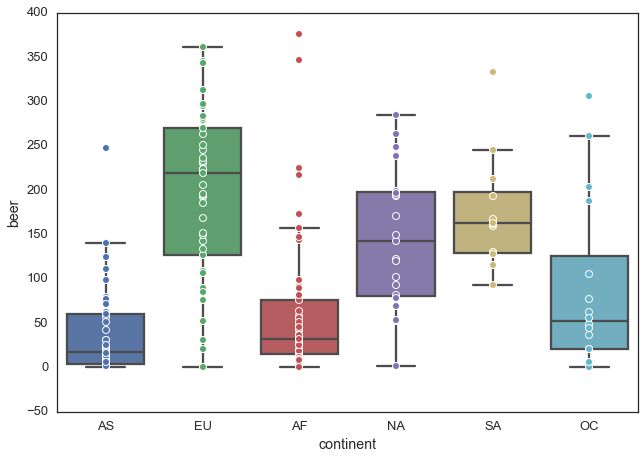

In [49]:
sns.boxplot(x="continent",y="beer",data=drinks)
sns.stripplot(x="continent",y="beer",data=drinks,jitter=False)

## LinePlot
Visualize some variable relative to a fixed ordering. For example, plotting a time series - the value of some variable at each time point.

In [50]:
# Load in the UFO data set
url = '../data/ufo.csv'
ufo = pd.read_csv(url)
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo['Year'] = ufo.Time.dt.year

# counts occurences per year
ufo.Year.value_counts().sort_index().head(10)

IOError: File ../data/ufo.csv does not exist

In [51]:
ufo.Year.value_counts().sort_index().plot()
plt.ylabel("UFO Sightings")
plt.xlabel("Year")

NameError: name 'ufo' is not defined

## Grids
Often helpful to look at many variables simultaneously while separating the data into different segments (like a visual groupby).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11285a250>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11440a8d0>]], dtype=object)

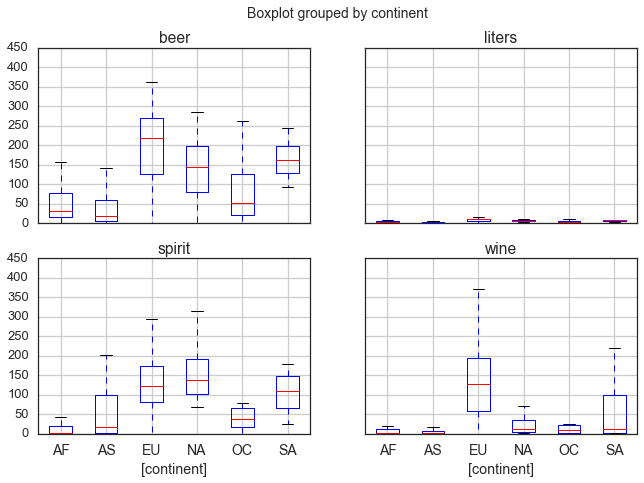

In [52]:
drinks.boxplot(by='continent')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11501a2d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1151a1fd0>]], dtype=object)

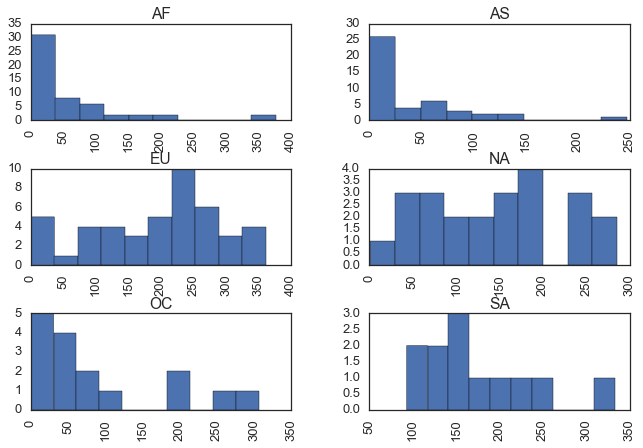

In [53]:
# histogram of beer servings grouped by continent
drinks.hist(column='beer', by='continent')

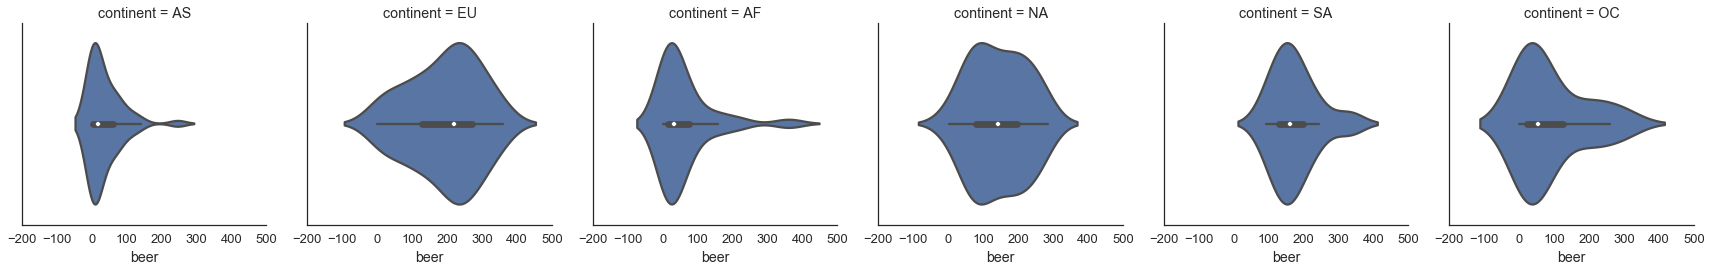

In [54]:
sns.factorplot(x="beer",col="continent",data=drinks,kind="violin")


Many complicated grids are possible (https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.factorplot.html)

## Saving

IOError: [Errno 13] Permission denied: '../../../../beer_histogram.png'

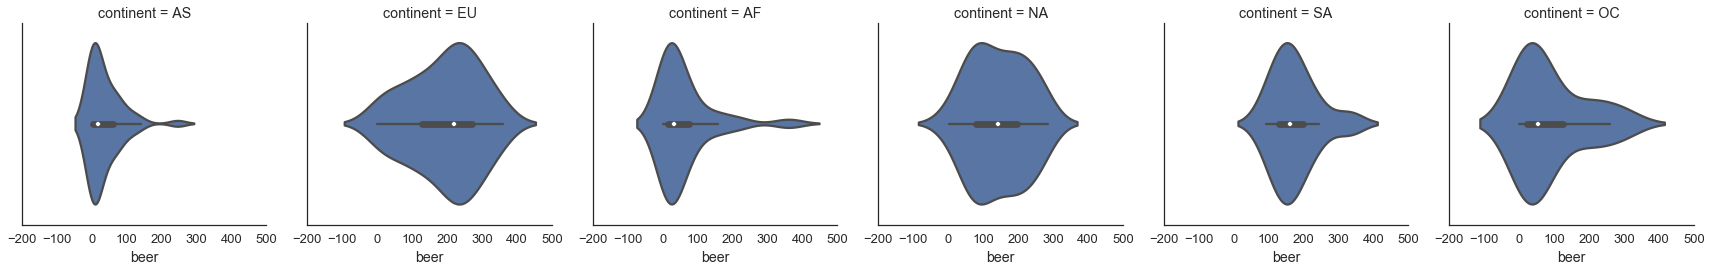

In [55]:
sns.factorplot(x="beer",col="continent",data=drinks,kind="violin")
plt.savefig('../../../../beer_histogram.png')

### Bokeh
The newest kid on the block is Bokeh (http://bokeh.pydata.org/), a python library that is a wrapper for some HTML/javascript plotting tools. This way, we can use simple Python commands to utilize the power of web technologies to have immersive, interactive data visualizations.